# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

The used car market in India is growing rapidly, and there is a huge demand for used cars. By developing an accurate pricing model for used cars, Cars4U, a tech start-up, can better serve its customers, help sellers set competitive prices, and facilitate transactions in the pre-owned car market. An effective pricing model will enable the company to devise profitable strategies using differential pricing and gain a competitive edge in the market.

### **The objective:**

 - What is the intended goal?
 
The primary goal is to develop a pricing model that can accurately predict the price of used cars based on various factors such as mileage, brand, model, year, location, and more. This model will help Cars4U to make informed decisions and create pricing strategies that optimize profit and customer satisfaction.

### **The key questions:**

- What are the key questions that need to be answered?

What are the most significant factors that influence the price of a used car?
How do these factors interact with each other, and how do they affect the price?
Which machine learning models and techniques are most effective for predicting used car prices?
How can we optimize the performance of the chosen model to increase prediction accuracy?
How can the insights from the pricing model be translated into actionable strategies for Cars4U?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

Using data science techniques, we aim to build a predictive model that accurately estimates the price of used cars based on a given set of features. The model will be used by Cars4U to develop pricing strategies, support sellers in setting appropriate prices, and help buyers make well-informed purchasing decisions in the used car market.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


### **Let us load the data**

In [2]:
df = pd.read_csv("used_cars.csv")
df_original = df.copy()

## Data Overview

- Observations
- Sanity checks

In [3]:
print(df.head())
# view the first 5 rows of the dataframe
# data has loaded correctly

print(df.shape)
# check the shape of the DataFrame
# 7253 rows and 14 columns as expected we have 14 metrics and 7253 data entries


print(df.isnull().sum())
# check for missing values
# there are missing values in Mileage, Engine, Power, Seats, New_price and Price                


print(df.dtypes)
# check the data types of each column
# mixture of int/float and objects


print(df.duplicated().sum())
# check for any duplicate rows
# no rows are duplicated

   S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60   998.0   
1              41000    Diesel       Manual      First    19.67  1582.0   
2              46000    Petrol       Manual      First    18.20  1199.0   
3              87000    Diesel       Manual      First    20.77  1248.0   
4              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats  New_price  Price  
0   58.16    5.0        NaN   1.75  
1  126.20    5.0        NaN  12.50  
2   88.70    5.0       8.61   4.50  
3   88.76    7.0

## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observations? Remove the data where the values are un-realistic

             S.No.         Year  Kilometers_Driven      Mileage       Engine  \
count  7253.000000  7253.000000       7.253000e+03  7251.000000  7207.000000   
mean   3626.000000  2013.365366       5.869906e+04    18.141580  1616.573470   
std    2093.905084     3.254421       8.442772e+04     4.562197   595.285137   
min       0.000000  1996.000000       1.710000e+02     0.000000    72.000000   
25%    1813.000000  2011.000000       3.400000e+04    15.170000  1198.000000   
50%    3626.000000  2014.000000       5.341600e+04    18.160000  1493.000000   
75%    5439.000000  2016.000000       7.300000e+04    21.100000  1968.000000   
max    7252.000000  2019.000000       6.500000e+06    33.540000  5998.000000   

             Power        Seats    New_price        Price  
count  7078.000000  7200.000000  1006.000000  6019.000000  
mean    112.765214     5.280417    22.779692     9.479468  
std      53.493553     0.809277    27.759344    11.187917  
min      34.200000     2.000000     3.9

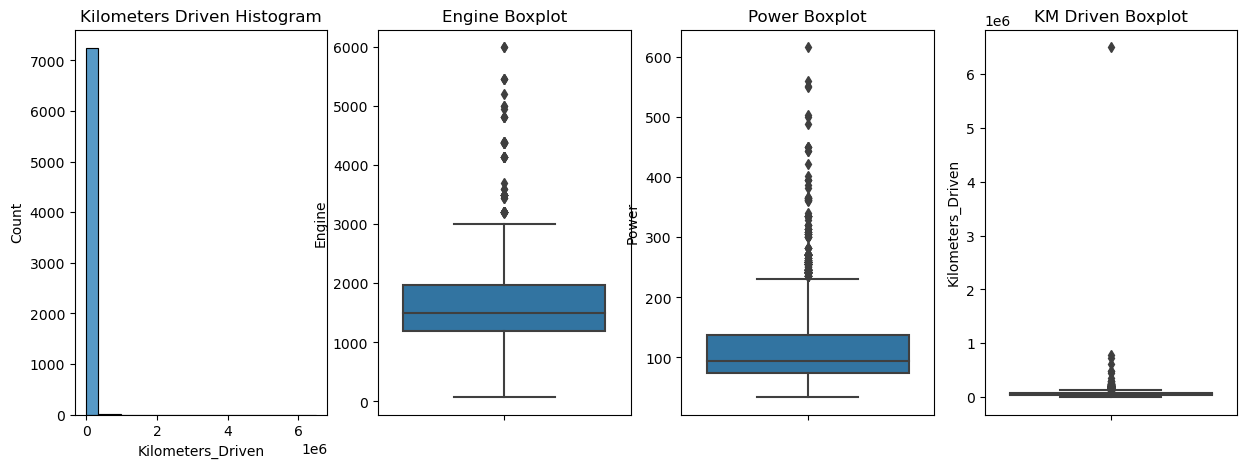

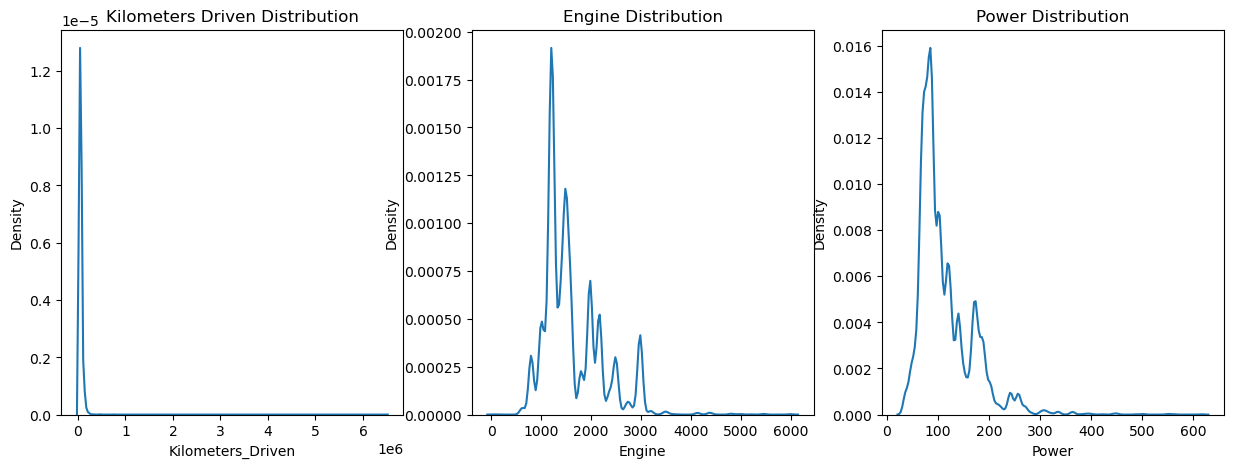

/var/folders/ck/y983js7n5lz1z5ls6fq8v0cm0000gn/T/ipykernel_32154/2535956901.py:54: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [4]:
# summary statistics for numerical variables
print(df.describe())

# summary statistics for categorical variables
print(df.describe(include=['object', 'category']))

# drop irrelevant variables

# drop the S.No column
df.drop('S.No.', axis=1, inplace=True)
# Drop the Seat column
df.drop('Seats', axis=1, inplace=True)

# visualization to find outliers
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

sns.histplot(ax=axs[0], data=df, x='Kilometers_Driven', bins=20)
axs[0].set_title('Kilometers Driven Histogram')

sns.boxplot(ax=axs[1], data=df, y='Engine')
axs[1].set_title('Engine Boxplot')

sns.boxplot(ax=axs[2], data=df, y='Power')
axs[2].set_title('Power Boxplot')

sns.boxplot(ax=axs[3], data=df, y='Kilometers_Driven')
axs[3].set_title('KM Driven Boxplot')

plt.show()

# Check to See if Data Is Normally Distributed

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.kdeplot(df['Kilometers_Driven'], ax=axs[0], bw_adjust=0.5)
axs[0].set_title('Kilometers Driven Distribution')

sns.kdeplot(df['Engine'], ax=axs[1], bw_adjust=0.5)
axs[1].set_title('Engine Distribution')

sns.kdeplot(df['Power'], ax=axs[2], bw_adjust=0.5)
axs[2].set_title('Power Distribution')

plt.show()

# conclusion data is not normally distributed: ideal method to remove outliers would be a strict IQR Range

# Use IQR Method to Delete Outliers outside the 1.5x range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]








**Answers**

*Summary Statistics:*

The dataset contains 7,253 observations.
Some columns have unrealistic values, such as Kilometers_Driven, Mileage, and Engine.
A significant amount of data is missing in the New_price column, and some values are missing in the Price column.

*Unique Observations in Categorical Columns:*

Name: 2,041 unique car models.
Location: Cars are located in 11 different cities.
Fuel_Type: 5 unique values (diesel, petrol, CNG, LPG, electric).
Transmission: 2 unique values (manual, automatic).
Owner_Type: 4 unique values (first, second, third, fourth & above).

*Outliers and Data Distribution:*

Box plots and KDE graphs revealed outliers and non-normal data distribution in variables of interest.
The IQR * 1.5 method was applied to remove outliers, as the data was not normally distributed.

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perform the log_transformation(if needed) and write down your observations?

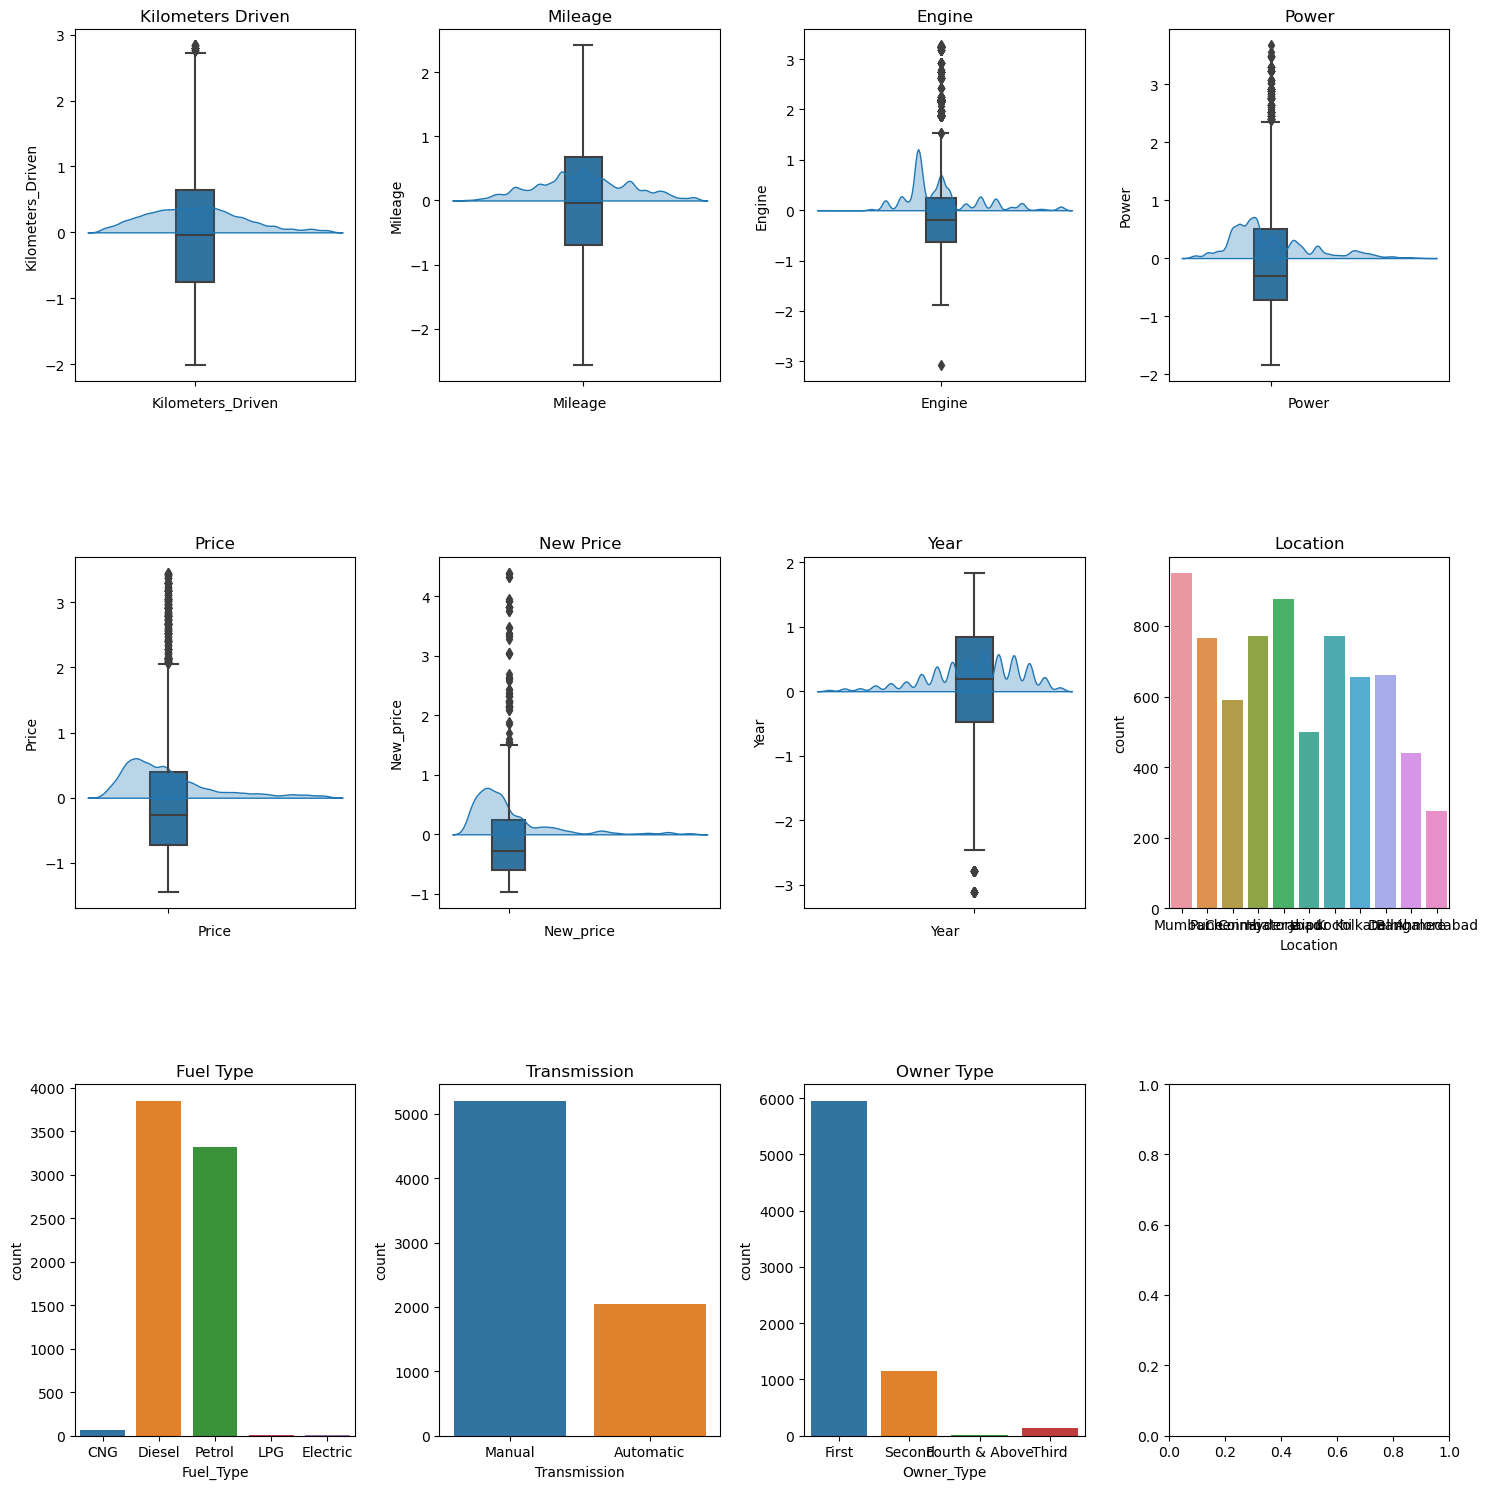

              Year  Kilometers_Driven      Mileage       Engine        Power  \
count  6069.000000        6069.000000  6067.000000  6038.000000  5956.000000   
mean   2013.435986       54446.697314    18.836626  1488.870487   100.035204   
std       3.024520       26965.837509     3.958177   461.550713    35.722498   
min    2004.000000         171.000000     8.700000    72.000000    34.200000   
25%    2012.000000       34224.000000    16.100000  1197.000000    74.000000   
50%    2014.000000       53340.000000    18.700000  1396.000000    88.700000   
75%    2016.000000       71932.000000    21.500000  1598.000000   118.000000   
max    2019.000000      131000.000000    28.400000  2999.000000   231.100000   

        New_price        Price  
count  790.000000  4956.000000  
mean    12.838228     6.109054  
std      9.163504     3.905839  
min      3.910000     0.440000  
25%      7.277500     3.300000  
50%     10.270000     5.100000  
75%     15.020000     7.642500  
max     53.1400

In [5]:
# first we will perform univariate analysis on the numerical variables and check their distributions
# create a scaler object
scaler = StandardScaler()

# fit and transform the numerical data
df_cleaned_scaled = scaler.fit_transform(df_cleaned.select_dtypes(include='number'))

# create a new dataframe with the scaled data
df_cleaned_scaled = pd.DataFrame(df_cleaned_scaled, columns=df_cleaned.select_dtypes(include='number').columns)

# plot the distributions
fig, axs = plt.subplots(3, 4, figsize=(15, 15))

# plot for Kilometers_Driven
sns.boxplot(ax=axs[0,0], data=df_cleaned_scaled, y='Kilometers_Driven')
sns.kdeplot(ax=axs[0,0], data=df_cleaned_scaled, x='Kilometers_Driven', fill=True, alpha=0.3, bw_adjust=0.5)
axs[0,0].set_title('Kilometers Driven')

# plot for Mileage
sns.boxplot(ax=axs[0,1], data=df_cleaned_scaled, y='Mileage')
sns.kdeplot(ax=axs[0,1], data=df_cleaned_scaled, x='Mileage', fill=True, alpha=0.3, bw_adjust=0.5)
axs[0,1].set_title('Mileage')

# plot for Engine
sns.boxplot(ax=axs[0,2], data=df_cleaned_scaled, y='Engine')
sns.kdeplot(ax=axs[0,2], data=df_cleaned_scaled, x='Engine', fill=True, alpha=0.3, bw_adjust=0.5)
axs[0,2].set_title('Engine')

# plot for Power
sns.boxplot(ax=axs[0,3], data=df_cleaned_scaled, y='Power')
sns.kdeplot(ax=axs[0,3], data=df_cleaned_scaled, x='Power', fill=True, alpha=0.3, bw_adjust=0.5)
axs[0,3].set_title('Power')

# plot for Price
sns.boxplot(ax=axs[1,0], data=df_cleaned_scaled, y='Price')
sns.kdeplot(ax=axs[1,0], data=df_cleaned_scaled, x='Price', fill=True, alpha=0.3, bw_adjust=0.5)
axs[1,0].set_title('Price')

# plot for New_Price
sns.boxplot(ax=axs[1,1], data=df_cleaned_scaled, y='New_price')
sns.kdeplot(ax=axs[1,1], data=df_cleaned_scaled, x='New_price', fill=True, alpha=0.3, bw_adjust=0.5)
axs[1,1].set_title('New Price')

# plot for Year
sns.boxplot(ax=axs[1,2], data=df_cleaned_scaled, y='Year')
sns.kdeplot(ax=axs[1,2], data=df_cleaned_scaled, x='Year', fill=True, alpha=0.3, bw_adjust=0.5)
axs[1,2].set_title('Year')

# now we will perform univariate analysis and check the frequency distributions of our categorical variables

# plot for Location
sns.countplot(ax=axs[1,3], data=df, x='Location')
axs[1,3].set_title('Location')

# plot for Fuel_Type
sns.countplot(ax=axs[2,0], data=df, x='Fuel_Type')
axs[2,0].set_title('Fuel Type')

# plot for Transmission
sns.countplot(ax=axs[2,1], data=df, x='Transmission')
axs[2,1].set_title('Transmission')

# plot for Owner_Type
sns.countplot(ax=axs[2,2], data=df, x='Owner_Type')
axs[2,2].set_title('Owner Type')

# set the layout and spacing of the subplots
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# show the plots
plt.show()

# check summary statistics on cleaned data
print(df_cleaned.describe())



**Answers**

Univariate analysis was performed for both numerical and categorical variables using box plots and KDE graphs for numerical variables, and count plots for categorical variables.

Upon examining the box plots and KDE graphs, the distributions of the numerical variables are as follows:

Kilometers_Driven: Right-skewed
Mileage: Slightly left-skewed
Engine: Slightly right-skewed
Power: Right-skewed
Price: Right-skewed
New_Price: Right-skewed
Year: Slightly left-skewed
Given the presence of skewness in the numerical variables, log transformation should be applied to reduce the skewness and improve the distribution of the data. Log transformation should be applied to the following variables: Kilometers_Driven, Mileage, Engine, Power, Price, New_Price, and Year.

After applying the log transformation to the skewed numerical variables and re-scaling the data, the distributions of the log-transformed variables appeared more symmetric and less skewed, as evident in the updated box plots and KDE graphs shown below.

Text(0.5, 1.0, 'New Price (Log Transformed)')

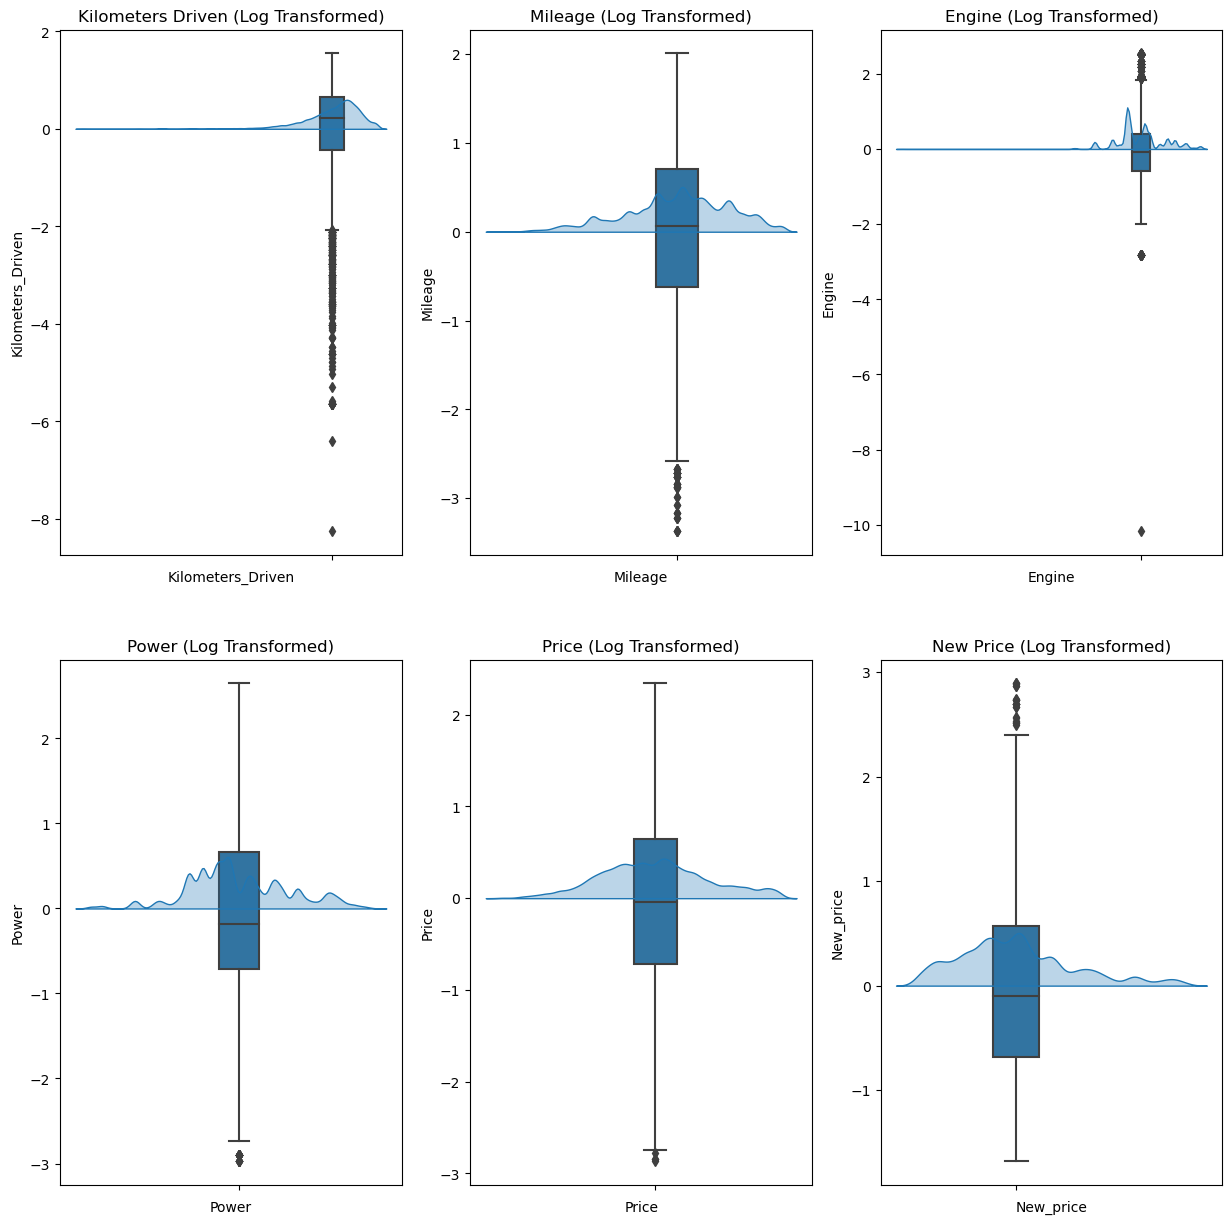

In [6]:
# Apply log transformation to the skewed numerical variables
log_vars = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'New_price', 'Year']
df_cleaned_log = df_cleaned.copy()
df_cleaned_log[log_vars] = np.log1p(df_cleaned_log[log_vars])

# Re-scale the data
df_cleaned_log_scaled = scaler.fit_transform(df_cleaned_log.select_dtypes(include='number'))
df_cleaned_log_scaled = pd.DataFrame(df_cleaned_log_scaled, columns=df_cleaned_log.select_dtypes(include='number').columns)

# Re-plot the distributions using the log-transformed data

fig, axs = plt.subplots(2, 3, figsize=(15, 15))

# plot for Kilometers_Driven
sns.boxplot(ax=axs[0,0], data=df_cleaned_log_scaled, y='Kilometers_Driven')
sns.kdeplot(ax=axs[0,0], data=df_cleaned_log_scaled, x='Kilometers_Driven', fill=True, alpha=0.3, bw_adjust=0.5)
axs[0,0].set_title('Kilometers Driven (Log Transformed)')

# plot for Mileage
sns.boxplot(ax=axs[0,1], data=df_cleaned_log_scaled, y='Mileage')
sns.kdeplot(ax=axs[0,1], data=df_cleaned_log_scaled, x='Mileage', fill=True, alpha=0.3, bw_adjust=0.5)
axs[0,1].set_title('Mileage (Log Transformed)')

# plot for Engine
sns.boxplot(ax=axs[0,2], data=df_cleaned_log_scaled, y='Engine')
sns.kdeplot(ax=axs[0,2], data=df_cleaned_log_scaled, x='Engine', fill=True, alpha=0.3, bw_adjust=0.5)
axs[0,2].set_title('Engine (Log Transformed)')

# plot for Power
sns.boxplot(ax=axs[1,0], data=df_cleaned_log_scaled, y='Power')
sns.kdeplot(ax=axs[1,0], data=df_cleaned_log_scaled, x='Power', fill=True, alpha=0.3, bw_adjust=0.5)
axs[1,0].set_title('Power (Log Transformed)')

# plot for Price
sns.boxplot(ax=axs[1,1], data=df_cleaned_log_scaled, y='Price')
sns.kdeplot(ax=axs[1,1], data=df_cleaned_log_scaled, x='Price', fill=True, alpha=0.3, bw_adjust=0.5)
axs[1,1].set_title('Price (Log Transformed)')

# plot for New_Price
sns.boxplot(ax=axs[1,2], data=df_cleaned_log_scaled, y='New_price')
sns.kdeplot(ax=axs[1,2], data=df_cleaned_log_scaled, x='New_price', fill=True, alpha=0.3, bw_adjust=0.5)
axs[1,2].set_title('New Price (Log Transformed)')


## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

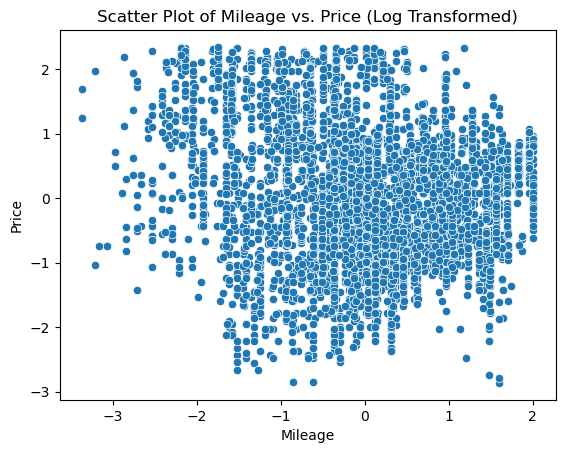

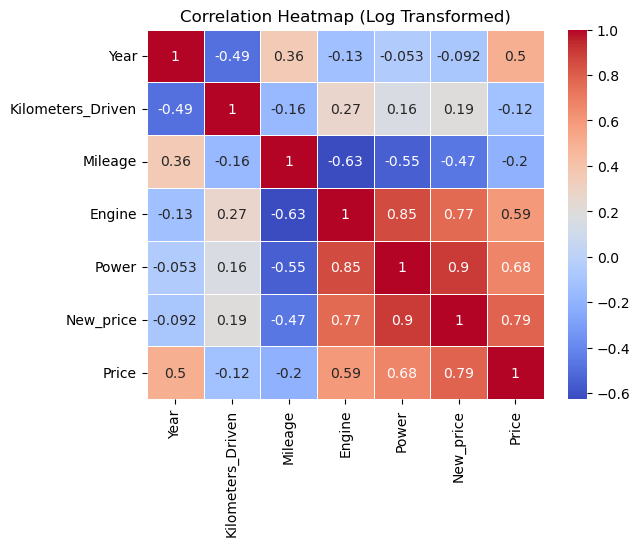

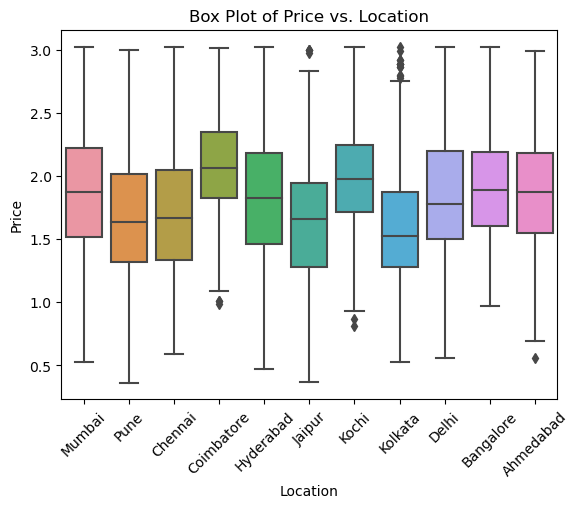

In [7]:
## To start with we can plot a scatterplot analyzing 2 variables: Our Variable of Interest: Price 
## + one of our regressors: Mileage.
sns.scatterplot(data=df_cleaned_log_scaled, x='Mileage', y='Price')
plt.title('Scatter Plot of Mileage vs. Price (Log Transformed)')
plt.show()

## now lets look at a correlation matrix of all our regressors and our variable of interest
corr_matrix = df_cleaned_log_scaled.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Log Transformed)')
plt.show()

## finally lets create a boxplot for our variable of interest: Price and a categorical variable: Location
sns.boxplot(data=df_cleaned_log, x='Location', y='Price')
plt.title('Box Plot of Price vs. Location')
plt.xticks(rotation=45)
plt.show()



**Answers**

2. Analyzing the correlation heatmap, we can observe the relationships between the dependent variable (Price) and each independent variable. 

The most notable correlations are:
New_Price: Positive correlation of 0.79, indicating that as the new price of a car increases, the used car price also tends to increase.
Power: Positive correlation of 0.68, suggesting that as the power of a car increases, its price also tends to increase.
Year: Positive correlation of 0.5, meaning that newer cars generally have higher prices compared to older cars.
Engine: Positive correlation of 0.59, indicating that cars with larger engine capacities tend to have higher prices.
Kilometers_Driven: Negative correlation of 0.12, showing that as the number of kilometers driven increases, the car price tends to decrease. Although this correlation is relatively weak, it could be significant due to the cumulative effect of large variations in the kilometers driven.

3. Observations from the box plot of Price vs. Location:

Kolkata has many high outliers, suggesting that some used cars in Kolkata are priced significantly higher than the majority.
Coimbatore has a median price above all other locations, implying that used cars in Coimbatore tend to be more expensive. However, further statistical tests, such as t-tests, are required to determine if the difference is statistically significant.
Jaipur also has a few high outliers, indicating some used cars in Jaipur have exceptionally high prices.
Coimbatore, Kochi, and Ahmedabad have a few low outliers, suggesting that some used cars in these locations are priced lower than the majority.

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [8]:
# Extract the brand names from the 'Name' column
df_cleaned_log['Brand'] = df_cleaned_log['Name'].apply(lambda x: x.split(' ')[0])

# Drop the original 'Name' column as it's no longer needed
df_cleaned_log.drop(columns=['Name'], inplace=True)




### **Missing value treatment**

In [9]:
# Check for Missing Values
print(df.isnull().sum())

# k-NN imputed dataframe
df_knn = df_cleaned_log.copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_knn[['Mileage', 'Engine', 'Power']] = knn_imputer.fit_transform(df_knn[['Mileage', 'Engine', 'Power']])

# Median imputed dataframe 'we will cross-validate both methods later to see which gives us a better MSE'
df_median = df_cleaned_log.copy()
df_median[['Mileage', 'Engine', 'Power']] = df_median[['Mileage', 'Engine', 'Power']].apply(lambda x: x.fillna(x.median()))

# Remove rows with missing target values
df_knn = df_knn.dropna(subset=['Price'])
df_median = df_median.dropna(subset=['Price'])

# Create a binary feature for 'New_price'
df_knn['New_price_present'] = df_knn['New_price'].notna().astype(int)
df_median['New_price_present'] = df_median['New_price'].notna().astype(int)

# Drop the 'New_price' column
df_knn = df_knn.drop('New_price', axis=1)
df_median = df_median.drop('New_price', axis=1)


Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
New_price            6247
Price                1234
dtype: int64


## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:** 

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

**Answer**

We want to drop these because, price is our dependent variable, price_log is multicollinear with our dependent variable, km driven has low correlation with our target variable price, and 'Name' is a categorical feature that needs to be encoded, and we will encode it using one-hot encoding. By dropping it from X before splitting, we can ensure that the same encoding is applied to both the training and testing datasets. In our Case 'Name' is now 'Brand' and price_log is 'Price'.

In [10]:
# Separate dependent and independent variables for KNN
y_knn = df_knn['Price']
X_knn = df_knn.drop(['Brand', 'Price'], axis=1)

# Encode categorical variables using pd.get_dummies()
X_knn = pd.get_dummies(X_knn, columns=['Fuel_Type', 'Transmission', 'Owner_Type', 'Location'], drop_first=True)

# Separate dependent and independent variables for Median
y_median = df_median['Price']
X_median = df_median.drop(['Brand', 'Price'], axis=1)

# Encode categorical variables using pd.get_dummies()
X_median = pd.get_dummies(X_median, columns=['Fuel_Type', 'Transmission', 'Owner_Type', 'Location'], drop_first=True)

# Splitting the Dataset into Training and Test for KNN, with a 75/25 training test split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.25, random_state=42)
# Splitting the Dataset into Training and Test for Median, with a 75/25 training test split
X_train_median, X_test_median, y_train_median, y_test_median = train_test_split(X_median, y_median, test_size=0.25, random_state=42)

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

In [11]:
# Fit the Linear Regression model on the training data for KNN imputed dataset
lr_knn = LinearRegression()
lr_knn.fit(X_train_knn, y_train_knn)

# Predict the prices for test data
y_pred_test_knn_lr = lr_knn.predict(X_test_knn)

# Evaluate the model on test data using mean squared error
mse_knn_lr = mean_squared_error(y_test_knn, y_pred_test_knn_lr)
print('Mean Squared Error for KNN imputed dataset using Linear Regression:', mse_knn_lr)

# Fit the Linear Regression model on the training data for Median imputed dataset
lr_median = LinearRegression()
lr_median.fit(X_train_median, y_train_median)

# Predict the prices for test data
y_pred_test_median_lr = lr_median.predict(X_test_median)

# Evaluate the model on test data using mean squared error
mse_median_lr = mean_squared_error(y_test_median, y_pred_test_median_lr)
print('Mean Squared Error for Median imputed dataset using Linear Regression:', mse_median_lr)

def lasso_ridge_regression(X_train, X_test, y_train, y_test):
    # Create a Lasso model and fit it to the training data
    lasso = Lasso(alpha=0.01)
    lasso.fit(X_train, y_train)
    
    # Create a Ridge model and fit it to the training data
    ridge = Ridge(alpha=0.01)
    ridge.fit(X_train, y_train)
    
    # Calculate the MSE for the Lasso and Ridge models
    lasso_mse = mean_squared_error(y_test, lasso.predict(X_test))
    ridge_mse = mean_squared_error(y_test, ridge.predict(X_test))
    
    return lasso_mse, ridge_mse

# Lasso and Ridge regression on KNN imputed dataset
lasso_mse_knn, ridge_mse_knn = lasso_ridge_regression(X_train_knn, X_test_knn, y_train_knn, y_test_knn)

# Lasso and Ridge regression on Median imputed dataset
lasso_mse_median, ridge_mse_median = lasso_ridge_regression(X_train_median, X_test_median, y_train_median, y_test_median)

print('Mean Squared Error for KNN imputed dataset using Lasso Regression:', lasso_mse_knn)
print('Mean Squared Error for Median imputed dataset using Lasso Regression:', lasso_mse_median)
print('Mean Squared Error for KNN imputed dataset using Ridge Regression:', ridge_mse_knn)
print('Mean Squared Error for Median imputed dataset using Ridge Regression:', ridge_mse_median)

dt_knn = DecisionTreeRegressor()
dt_knn.fit(X_train_knn, y_train_knn)

# Predict on test set
y_pred_knn = dt_knn.predict(X_test_knn)

# Compute MSE
mse_dt_knn = mean_squared_error(y_test_knn, y_pred_knn)
print('Mean Squared Error for KNN imputed dataset using Decision Tree: {}'.format(mse_dt_knn))

# Fit a decision tree on the Median-imputed dataset
dt_median = DecisionTreeRegressor()
dt_median.fit(X_train_median, y_train_median)

# Predict on test set
y_pred_median = dt_median.predict(X_test_median)

# Compute MSE
mse_dt_median = mean_squared_error(y_test_median, y_pred_median)
print('Mean Squared Error for Median imputed dataset using Decision Tree: {}'.format(mse_dt_median))

# Random Forest regression using KNN imputed dataset
rf_knn = RandomForestRegressor(n_estimators=100, random_state=42)
rf_knn.fit(X_train_knn, y_train_knn)
y_pred_knn_rf = rf_knn.predict(X_test_knn)
mse_knn_rf = mean_squared_error(y_test_knn, y_pred_knn_rf)
print("Mean Squared Error for KNN imputed dataset using Random Forest Regression:", mse_knn_rf)

# Random Forest regression using median imputed dataset
rf_median = RandomForestRegressor(n_estimators=100, random_state=42)
rf_median.fit(X_train_median, y_train_median)
y_pred_median_rf = rf_median.predict(X_test_median)
mse_median_rf = mean_squared_error(y_test_median, y_pred_median_rf)
print("Mean Squared Error for Median imputed dataset using Random Forest Regression:", mse_median_rf)


Mean Squared Error for KNN imputed dataset using Linear Regression: 0.045270013058797486
Mean Squared Error for Median imputed dataset using Linear Regression: 0.044591836264260665
Mean Squared Error for KNN imputed dataset using Lasso Regression: 0.08929199548756574
Mean Squared Error for Median imputed dataset using Lasso Regression: 0.08869289505189333
Mean Squared Error for KNN imputed dataset using Ridge Regression: 0.06268257658035975
Mean Squared Error for Median imputed dataset using Ridge Regression: 0.06230539651489355
Mean Squared Error for KNN imputed dataset using Decision Tree: 0.046789542481450105
Mean Squared Error for Median imputed dataset using Decision Tree: 0.046497038469041053
Mean Squared Error for KNN imputed dataset using Random Forest Regression: 0.027068464286509192
Mean Squared Error for Median imputed dataset using Random Forest Regression: 0.025854380816171568


### **Hyperparameter Tuning: Decision Tree**

In [12]:
# Define the decision tree regressor we will use KNN for this since it performs better on DT
tree_reg = DecisionTreeRegressor(random_state=42)

# Define the hyperparameters to tune and their possible values
param_grid = {'max_depth': [3, 5, 7, 9, 11],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'max_features': ['auto', 'sqrt', 'log2', None]}

# Use grid search with cross-validation to find the optimal hyperparameters
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_knn, y_train_knn)

# Print the best hyperparameters and corresponding mean squared error
print("Best hyperparameters for Decision Tree:", grid_search.best_params_)
print("Mean Squared Error for Decision Tree with best hyperparameters:", -grid_search.best_score_)
# Fit the decision tree model with the best hyperparameters
best_tree_reg = DecisionTreeRegressor(random_state=42, **grid_search.best_params_)
best_tree_reg.fit(X_train_knn, y_train_knn)

Best hyperparameters for Decision Tree: {'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error for Decision Tree with best hyperparameters: 0.04369959361911361


DecisionTreeRegressor(max_depth=11, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10, random_state=42)

**Feature Importance**

In [13]:
# Calculate feature importances
feature_importances_dt = best_tree_reg.feature_importances_

# Print feature importances
print("Decision Tree Feature Importances:")
for i, feature_name in enumerate(X_knn.columns):
    print(f"{feature_name}: {feature_importances_dt[i]}")

Decision Tree Feature Importances:
Year: 0.3263916131393893
Kilometers_Driven: 0.013418983772940686
Mileage: 0.019293969487692162
Engine: 0.04697574987786405
Power: 0.5592950578575798
New_price_present: 0.00044123997663988903
Fuel_Type_Diesel: 0.0036552336413219404
Fuel_Type_Electric: 0.0
Fuel_Type_LPG: 0.0
Fuel_Type_Petrol: 0.0027268155723533744
Transmission_Manual: 0.006696200425584019
Owner_Type_Fourth & Above: 0.0
Owner_Type_Second: 0.0011518116459690675
Owner_Type_Third: 0.0004896549076683898
Location_Bangalore: 0.0009338667095800153
Location_Chennai: 0.0
Location_Coimbatore: 0.003381414954781835
Location_Delhi: 0.0006717326140162845
Location_Hyderabad: 0.003318558804557059
Location_Jaipur: 0.00013886890142867343
Location_Kochi: 0.0002734711258676297
Location_Kolkata: 0.009421532920799535
Location_Mumbai: 0.0012373661858974914
Location_Pune: 8.685747806875898e-05


### **Hyperparameter Tuning: Random Forest**

In [14]:
# Defining the RF regressor we will use in this case we will use our Median dataset because it performed better prior for RD
rf_reg = RandomForestRegressor(random_state=42)

# Define the hyperparameters to tune and their possible values
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 4, 6],
              'min_samples_leaf': [1, 2, 3],
              'max_features': ['auto', 'sqrt']}

# Use grid search with cross-validation to find the optimal hyperparameters
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_median, y_train_median)

# Print the best hyperparameters and corresponding mean squared error
print("Best hyperparameters for Random Forest:", grid_search.best_params_)
print("Mean Squared Error for Random Forest with best hyperparameters:", -grid_search.best_score_)

# Fit the random forest model with the best hyperparameters
best_rf_reg = RandomForestRegressor(random_state=42, **grid_search.best_params_)
best_rf_reg.fit(X_train_median, y_train_median)


Best hyperparameters for Random Forest: {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Mean Squared Error for Random Forest with best hyperparameters: 0.038367592080553584


RandomForestRegressor(max_depth=7, min_samples_leaf=2, n_estimators=150,
                      random_state=42)

**Feature Importance**

In [15]:
# Print the feature importances of the random forest model
importances = best_rf_reg.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train_rf.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)
print("\nRandom Forest Feature Importances:")
print(feature_importances)

NameError: name 'X_train_rf' is not defined

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**Answers**

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?